In [2]:
import pandas as pd

data = pd.read_csv('data/nd2.csv')

data = data.drop(['Unnamed: 0'], axis=1)


In [5]:
data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12

In [9]:

dupl_columns = list(data.columns)
mask = data.duplicated(subset=dupl_columns)
ddups = data[mask]
print(f'Duplicates: {ddups.shape[0]}')


Duplicates: 161


In [7]:
ddata = data.drop_duplicates(subset=dupl_columns)
ddata.shape[0]

44589

In [14]:
ddata['Опыт работы (месяц)'].isna().sum()

168

In [10]:
th = ddata.shape[0]
ddata.dropna(how='any', thresh=th, axis=1)
ddata.shape[0]

values = {
    'Опыт работы (месяц)': ddata['Опыт работы (месяц)'].median()  
}

ddata = ddata.fillna(values)
ddata['Опыт работы (месяц)'].isna().sum()

print(round(ddata['Опыт работы (месяц)'].mean()))

114


In [11]:
outly = ddata[(ddata['ЗП (руб)'] > 1e6) | (ddata['ЗП (руб)'] < 1e3)]
ddata = ddata.drop(outly.index)
print(outly.shape[0])

89


In [12]:
outlier = ddata[ddata['Опыт работы (год)'] > ddata['Возраст']]
print(outlier.shape[0])
ddata = ddata.drop(outlier.index)



7


Outliers=3


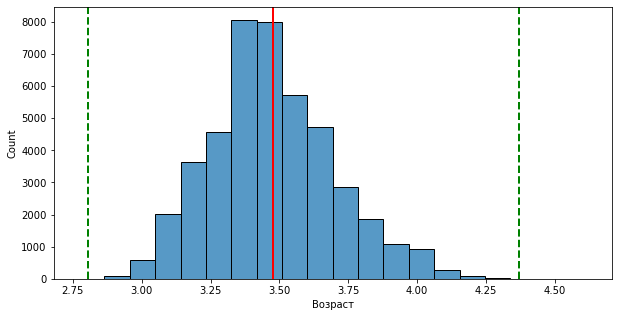

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def outzes(data, feature, log_scale=True, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
log_age = np.log(ddata['Возраст']+1)
histplot = sns.histplot(log_age, bins=20, ax=ax)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='g', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='g', ls='--', lw=2)
outliers, cleaned = outzes(ddata, 'Возраст', right=4)
print(f'Outliers={outliers.shape[0]}')

#Распределение ассимитрично в левую сторону